In [59]:
# clearing lib cache during development to force-update imports
import sys, importlib
importlib.reload(sys.modules['Logical'])

from Logical import LogicalCircuit

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

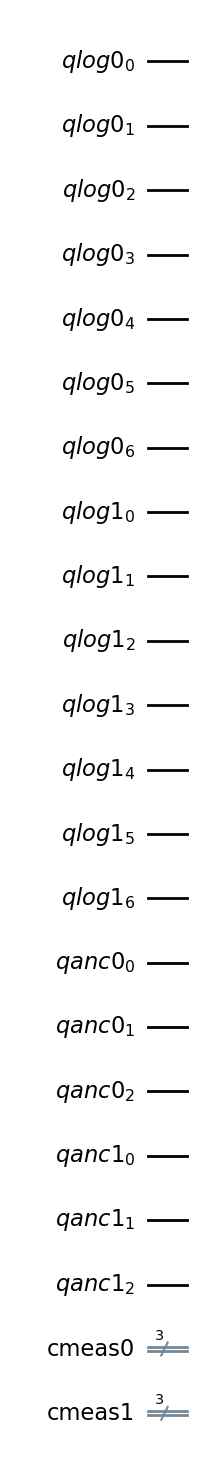

In [60]:
# create LogicalCircuit to store logical qubits
lqcirc = LogicalCircuit(2, name="SteaneCodeCircuit")
lqcirc.draw("mpl")

# q = [QuantumRegister(7, name=f"q{i}") for i in range(3)]
# c = [ClassicalRegister(3) for i in range(3)]
# tri = QuantumCircuit(*q, *c)
# tri.draw("mpl")

In [61]:
# Logical state preparation
lqcirc.encode(0, max_iterations=3)
lqcirc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=20, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'qlog0'), 0), Qubit(QuantumRegister(7, 'qlog0'), 1), Qubit(QuantumRegister(7, 'qlog0'), 2), Qubit(QuantumRegister(7, 'qlog0'), 3), Qubit(QuantumRegister(7, 'qlog0'), 4), Qubit(QuantumRegister(7, 'qlog0'), 5), Qubit(QuantumRegister(7, 'qlog0'), 6), Qubit(QuantumRegister(7, 'qlog1'), 0), Qubit(QuantumRegister(7, 'qlog1'), 1), Qubit(QuantumRegister(7, 'qlog1'), 2), Qubit(QuantumRegister(7, 'qlog1'), 3), Qubit(QuantumRegister(7, 'qlog1'), 4), Qubit(QuantumRegister(7, 'qlog1'), 5), Qubit(QuantumRegister(7, 'qlog1'), 6), Qubit(QuantumRegister(3, 'qanc0'), 0), Qubit(QuantumRegister(3, 'qanc0'), 1), Qubit(QuantumRegister(3, 'qanc0'), 2), Qubit(QuantumRegister(3, 'qanc1'), 0), Qubit(QuantumRegister(3, 'qanc1'), 1), Qubit(QuantumRegister(3, 'qanc1'), 2)), clbits=())

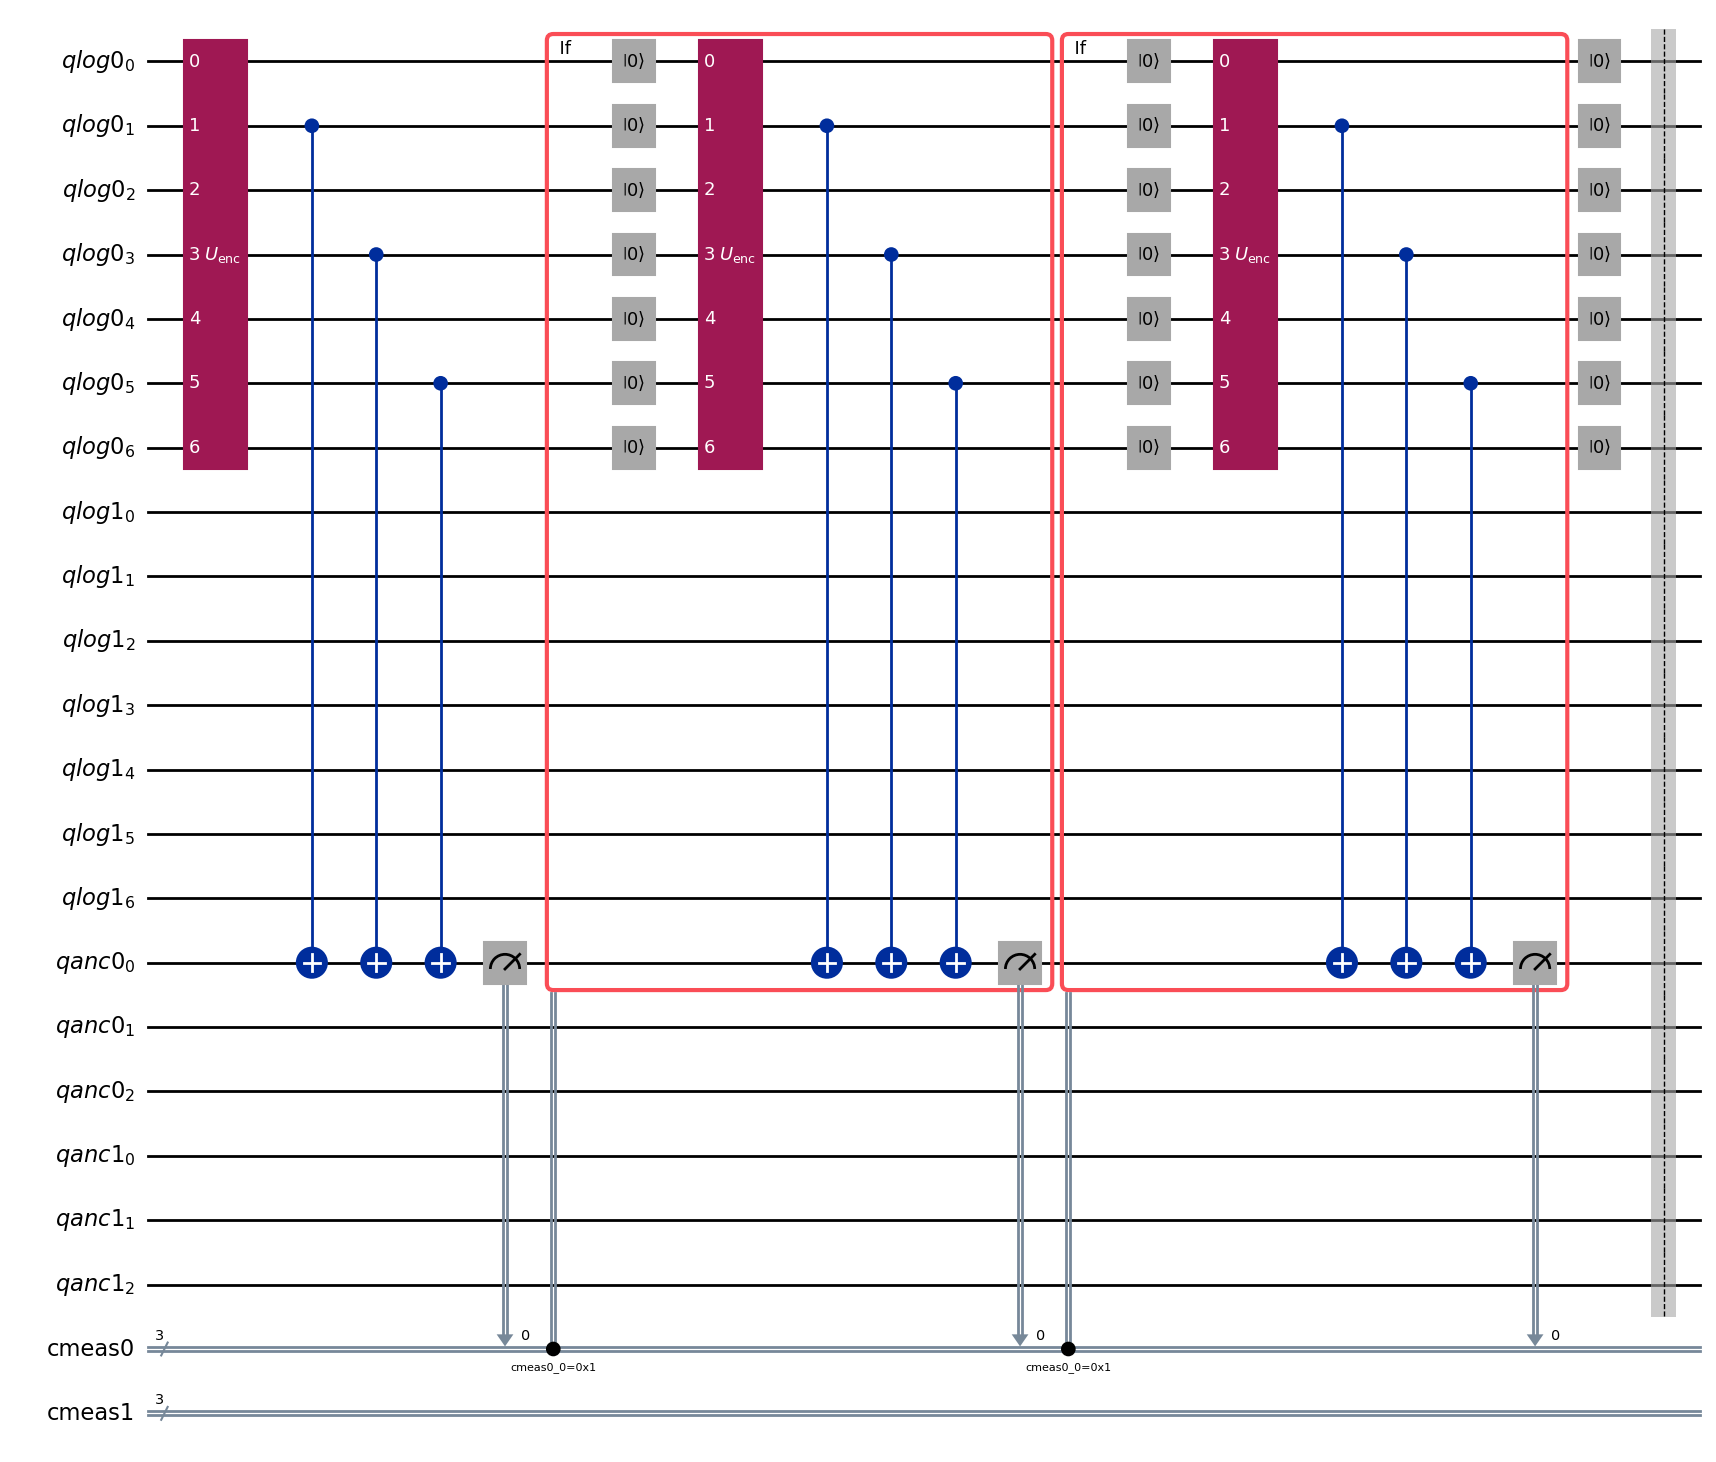

In [62]:
lqcirc.draw("mpl")

In [63]:
# Option 1: Automatic QEC cycling
lqcirc.configure_qec_cycle(sample_rate=["Depth", 5])
# <insert algorithm code>

# Option 2: Manually trigger QEC cycles
# <insert some algorithm steps>
lqcirc.perform_qec_cycle()
# <insert some algorithm steps>
lqcirc.perform_qec_cycle()
# <insert some algorithm steps>
# ...

[0, 1]
[QuantumRegister(3, 'qanc0'), QuantumRegister(3, 'qanc1')]
[0, 1]
[QuantumRegister(3, 'qanc0'), QuantumRegister(3, 'qanc1')]
